In [1]:

import pandas as pd
import plotly.express as px
import pandas as pd
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv(r'C:\Users\Jessica Shah\Desktop\Capstone\DIRECTOR_COMPANY_COREMETRICS.csv')

In [4]:
df

,DIRECTOR: ID,DIRECTOR: NAME,DIRECTOR: AGE,DIRECTOR: GENDER,DIRECTOR: DIVERSITY,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: TICKER,COMPANY: CUSIP,...,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE,PERFORMANCE: WIN RATE,PERFORMANCE: EBITDA WIN RATE,PERFORMANCE: TSR WIN RATE,PERFORMANCE: CARBON INTENSITY WIN RATE,PERFORMANCE: CONTROVERSY WIN RATE
0,150319,Adam Hanft,73.0,Male,NaN,2,2,"1-800-FLOWERS.COM, INC.",FLWS,NaN,...,No,No,No,No,No,Unrated,Unrated,Unrated,Unrated,Unrated
1,554436,Celia Brown,68.0,Female,NaN,1,1,"1-800-FLOWERS.COM, INC.",FLWS,NaN,...,No,Yes,Yes,No,No,0.616,0.312,0.521,0.819,1
2,108789,Christopher McCann,61.0,Male,NaN,1,1,"1-800-FLOWERS.COM, INC.",FLWS,NaN,...,Yes,No,No,No,Yes,0.618,0.315,0.536,0.817,1
3,677135,Dina Colombo,53.0,Female,NaN,1,1,"1-800-FLOWERS.COM, INC.",FLWS,NaN,...,No,No,Yes,No,No,Unrated,Unrated,Unrated,Unrated,Unrated
4,175585,Eugene DeMark,75.0,Male,NaN,1,2,"1-800-FLOWERS.COM, INC.",FLWS,NaN,...,No,Yes,Yes,No,No,0.618,0.314,0.529,0.818,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,559363,Troy Cox,58.0,Male,NaN,2,2,Zymeworks Inc,ZYME,NaN,...,No,No,Yes,No,No,Unrated,Unrated,Unrated,Unrated,Unrated
86768,232433,Barry Michaels,72.0,Male,NaN,1,1,Zynex Inc,ZYXI,NaN,...,No,Yes,Yes,No,No,0.807,0.692,0.69,0.806,1
86769,232874,Joshua Disbrow,47.0,Male,NaN,1,1,Zynex Inc,ZYXI,NaN,...,No,Yes,Yes,No,No,0.807,0.692,0.69,0.806,1
86770,638372,Michael Cress,64.0,Male,NaN,1,1,Zynex Inc,ZYXI,NaN,...,No,Yes,Yes,No,No,0.807,0.692,0.69,0.806,1


In [5]:
df.shape

(86772, 35)

In [6]:
df.isna().sum()

DIRECTOR: ID                                  0
DIRECTOR: NAME                                0
DIRECTOR: AGE                              8173
DIRECTOR: GENDER                             68
DIRECTOR: DIVERSITY                       86772
DIRECTOR: ACTIVE BOARDS                       0
DIRECTOR: BOARD HISTORY                       0
COMPANY: NAME                                 0
COMPANY: TICKER                              63
COMPANY: CUSIP                            86772
COMPANY: DOMICILE                             0
COMPANY: SECTOR                             506
COMPANY: LEAGUE                               0
COMPANY: ACTIVE DIRECTORS                     0
COMPANY: ALL DIRECTORS                        0
INFLUENCE: MRY                                0
INFLUENCE:2023                                0
INFLUENCE:2022                             9671
INFLUENCE:2021                            22128
INFLUENCE:2020                            37681
INFLUENCE:2019                          

In [7]:
df.nunique()

DIRECTOR: ID                              72759
DIRECTOR: NAME                            70389
DIRECTOR: AGE                                80
DIRECTOR: GENDER                              3
DIRECTOR: DIVERSITY                           0
DIRECTOR: ACTIVE BOARDS                       8
DIRECTOR: BOARD HISTORY                       9
COMPANY: NAME                              9529
COMPANY: TICKER                            8956
COMPANY: CUSIP                                0
COMPANY: DOMICILE                            67
COMPANY: SECTOR                              11
COMPANY: LEAGUE                               4
COMPANY: ACTIVE DIRECTORS                    23
COMPANY: ALL DIRECTORS                       34
INFLUENCE: MRY                              250
INFLUENCE:2023                              250
INFLUENCE:2022                              238
INFLUENCE:2021                              205
INFLUENCE:2020                              164
INFLUENCE:2019                          

In [8]:
summary = (df.describe()).transpose()
summary = summary.reset_index()
summary
HTML(summary.to_html(classes='table table-stripped'))

,index,count,mean,std,min,25%,50%,75%,max
0,DIRECTOR: ID,86772.0,478336.500622,226087.153906,10027.0,220478.0,582031.0,657504.25,727365.0
1,DIRECTOR: AGE,78599.0,59.691955,9.544452,21.0,54.0,60.0,66.00,104.0
2,DIRECTOR: DIVERSITY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DIRECTOR: ACTIVE BOARDS,86772.0,1.425310,0.795301,1.0,1.0,1.0,2.00,8.0
4,DIRECTOR: BOARD HISTORY,86772.0,1.549486,0.971494,1.0,1.0,1.0,2.00,9.0
5,COMPANY: CUSIP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,COMPANY: LEAGUE,86772.0,1.757514,0.779271,1.0,1.0,2.0,2.00,4.0
7,COMPANY: ACTIVE DIRECTORS,86772.0,9.966510,3.012179,3.0,8.0,9.0,12.00,29.0
8,COMPANY: ALL DIRECTORS,86772.0,13.353455,4.669654,3.0,10.0,13.0,16.00,39.0
9,INFLUENCE: MRY,86772.0,11.028240,12.781149,0.0,4.0,7.0,13.00,100.0


In [9]:
new_data = df.dropna(axis = 0, how ='any')

In [10]:
df = df.drop('DIRECTOR: DIVERSITY', axis=1)


In [11]:
df = df.drop('COMPANY: CUSIP', axis=1)

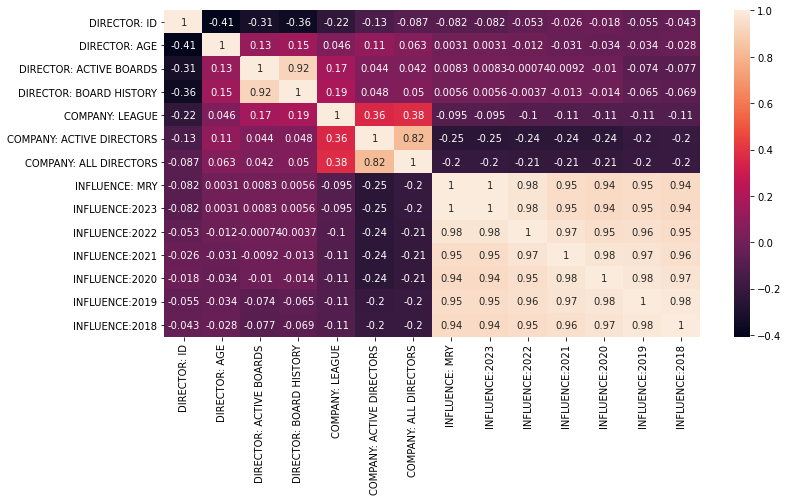

In [12]:
plt.figure(figsize=(12,6))
corrMat = sns.heatmap(df.corr(), annot=True)

In [13]:
df['DIRECTOR: AGE'].unique()

array([ 73.,  68.,  61.,  53.,  75.,  78.,  71.,  59.,  70.,  64.,  47.,
        55.,  63.,  54.,  45.,  50.,  44.,  62.,  57.,  58.,  51.,  52.,
        65.,  67.,  74.,  39.,  69.,  56.,  72.,  48.,  49.,  60.,  nan,
        46.,  66.,  42.,  40.,  79.,  41.,  43.,  76.,  37.,  32.,  84.,
        28.,  38.,  86.,  80.,  77.,  35.,  29.,  82.,  81.,  31.,  33.,
        34.,  87.,  83.,  92.,  89.,  36.,  90.,  27.,  30.,  96.,  93.,
        25.,  85.,  97.,  91.,  88.,  99.,  94.,  26.,  24., 104.,  98.,
        23., 100.,  21.,  22.])

In [14]:
df['DIRECTOR: AGE'].min()

21.0

In [15]:
df['DIRECTOR: AGE'].max()

104.0

In [16]:
# Creating dummy variables for categorical variables
kickstarterData_wDummmy = df.copy()
kickstarterData_wDummmy=pd.get_dummies(kickstarterData_wDummmy,columns=['INFLUENCE DRIVER: ADVANCED DEGREE',
                                                  'INFLUENCE DRIVER: ELITE SCHOOL', 
                                                  'INFLUENCE DRIVER: BOARD CONNECTIONS', 
                                                  'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 
                                                  'INFLUENCE DRIVER: COMMITTEE ROLE', 
                                                  'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE',
                                                  'DIRECTOR: GENDER','COMPANY: SECTOR','COMPANY: LEAGUE','DIRECTOR: ACTIVE BOARDS','INFLUENCE DRIVER: CHAIR ROLE'])
kickstarterData_wDummmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86772 entries, 0 to 86771
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DIRECTOR: ID                                86772 non-null  int64  
 1   DIRECTOR: NAME                              86772 non-null  object 
 2   DIRECTOR: AGE                               78599 non-null  float64
 3   DIRECTOR: BOARD HISTORY                     86772 non-null  int64  
 4   COMPANY: NAME                               86772 non-null  object 
 5   COMPANY: TICKER                             86709 non-null  object 
 6   COMPANY: DOMICILE                           86772 non-null  object 
 7   COMPANY: ACTIVE DIRECTORS                   86772 non-null  int64  
 8   COMPANY: ALL DIRECTORS                      86772 non-null  int64  
 9   INFLUENCE: MRY                              86772 non-null  float64
 10  INFLUENCE:

In [17]:
data= data.copy()
kickstarterData_wDummmy=pd.get_dummies(kickstarterData_wDummmy,columns=['INFLUENCE DRIVER: ADVANCED DEGREE',
                                                  'INFLUENCE DRIVER: ELITE SCHOOL', 
                                                  'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE']
                                   

SyntaxError: unexpected EOF while parsing (<ipython-input-17-6fca59f9738c>, line 5)

In [18]:
kickstarterData_wDummmy=kickstarterData_wDummmy.drop(['DIRECTOR: NAME','COMPANY: TICKER','DIRECTOR: ID','DIRECTOR: BOARD HISTORY','COMPANY: NAME','COMPANY: DOMICILE','COMPANY: ACTIVE DIRECTORS','PERFORMANCE: WIN RATE','PERFORMANCE: EBITDA WIN RATE','PERFORMANCE: TSR WIN RATE','PERFORMANCE: CARBON INTENSITY WIN RATE','PERFORMANCE: CONTROVERSY WIN RATE','INFLUENCE:2020','INFLUENCE:2019','INFLUENCE:2018'],axis=1)

In [19]:
kickstarterData_wDummmy.dropna()

,DIRECTOR: AGE,COMPANY: ALL DIRECTORS,INFLUENCE: MRY,INFLUENCE:2023,INFLUENCE:2022,INFLUENCE:2021,INFLUENCE DRIVER: HAS BEEN CEO,INFLUENCE DRIVER: ADVANCED DEGREE_No,INFLUENCE DRIVER: ADVANCED DEGREE_Yes,INFLUENCE DRIVER: ELITE SCHOOL_No,...,DIRECTOR: ACTIVE BOARDS_1,DIRECTOR: ACTIVE BOARDS_2,DIRECTOR: ACTIVE BOARDS_3,DIRECTOR: ACTIVE BOARDS_4,DIRECTOR: ACTIVE BOARDS_5,DIRECTOR: ACTIVE BOARDS_6,DIRECTOR: ACTIVE BOARDS_7,DIRECTOR: ACTIVE BOARDS_8,INFLUENCE DRIVER: CHAIR ROLE_No,INFLUENCE DRIVER: CHAIR ROLE_Yes
0,73.0,13,0.0,0.0,0.0,0.0,Yes,1,0,1,...,0,1,0,0,0,0,0,0,1,0
1,68.0,13,4.0,4.0,4.0,3.0,Yes,0,1,1,...,1,0,0,0,0,0,0,0,0,1
2,61.0,13,12.0,12.0,12.0,12.0,Yes,1,0,1,...,1,0,0,0,0,0,0,0,1,0
4,75.0,13,2.0,2.0,2.0,2.0,No,0,1,1,...,1,0,0,0,0,0,0,0,0,1
5,78.0,13,2.0,2.0,2.0,2.0,Yes,1,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,58.0,9,6.0,6.0,6.0,6.0,Yes,0,1,1,...,0,1,0,0,0,0,0,0,1,0
86768,72.0,4,18.0,18.0,18.0,18.0,Yes,0,1,1,...,1,0,0,0,0,0,0,0,0,1
86769,47.0,4,17.0,17.0,17.0,17.0,Yes,1,0,1,...,1,0,0,0,0,0,0,0,0,1
86770,64.0,4,18.0,18.0,18.0,18.0,Yes,0,1,1,...,1,0,0,0,0,0,0,0,0,1


In [20]:
kickstarterData_wDummmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86772 entries, 0 to 86771
Data columns (total 47 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DIRECTOR: AGE                               78599 non-null  float64
 1   COMPANY: ALL DIRECTORS                      86772 non-null  int64  
 2   INFLUENCE: MRY                              86772 non-null  float64
 3   INFLUENCE:2023                              86772 non-null  float64
 4   INFLUENCE:2022                              77101 non-null  float64
 5   INFLUENCE:2021                              64644 non-null  float64
 6   INFLUENCE DRIVER: HAS BEEN CEO              86772 non-null  object 
 7   INFLUENCE DRIVER: ADVANCED DEGREE_No        86772 non-null  uint8  
 8   INFLUENCE DRIVER: ADVANCED DEGREE_Yes       86772 non-null  uint8  
 9   INFLUENCE DRIVER: ELITE SCHOOL_No           86772 non-null  uint8  
 10  INFLUENCE 

In [21]:
kickstarterData_wDummmy=kickstarterData_wDummmy.drop(['DIRECTOR: AGE','INFLUENCE: MRY','INFLUENCE:2023','INFLUENCE:2022','INFLUENCE:2021'],axis=1)

In [22]:
# 70/30 division of training and test dataset
X_train, X_test, y_train, y_test = train_test_split(kickstarterData_wDummmy.drop('INFLUENCE DRIVER: HAS BEEN CEO',axis=1), 
                                                    kickstarterData_wDummmy['INFLUENCE DRIVER: HAS BEEN CEO'], test_size=0.30, 
                                                    random_state=100)

In [23]:
logit_model1 = LogisticRegression(max_iter=3000)


In [24]:
result=logit_model1.fit(X_train,y_train)


In [25]:
y_pred = logit_model1.predict(X_test)

In [26]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model1.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.78      0.90      0.84     17000
         Yes       0.74      0.53      0.62      9032

    accuracy                           0.77     26032
   macro avg       0.76      0.72      0.73     26032
weighted avg       0.77      0.77      0.76     26032



In [28]:
# Confusion matrix 
confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
confusionMatrix

array([[15326,  1674],
       [ 4235,  4797]], dtype=int64)

<AxesSubplot:>

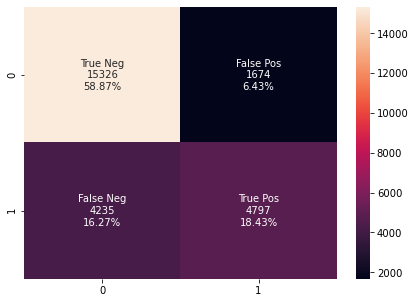

In [29]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusionMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusionMatrix.flatten()/np.sum(confusionMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix, annot=labels, fmt='')

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7730101413644745


In [31]:
kickstarterData_wDummmy.isnull().sum()

COMPANY: ALL DIRECTORS                        0
INFLUENCE DRIVER: HAS BEEN CEO                0
INFLUENCE DRIVER: ADVANCED DEGREE_No          0
INFLUENCE DRIVER: ADVANCED DEGREE_Yes         0
INFLUENCE DRIVER: ELITE SCHOOL_No             0
INFLUENCE DRIVER: ELITE SCHOOL_Yes            0
INFLUENCE DRIVER: BOARD CONNECTIONS_No        0
INFLUENCE DRIVER: BOARD CONNECTIONS_Yes       0
INFLUENCE DRIVER: FOUNDER-CEO-FAMILY_No       0
INFLUENCE DRIVER: FOUNDER-CEO-FAMILY_Yes      0
INFLUENCE DRIVER: COMMITTEE ROLE_No           0
INFLUENCE DRIVER: COMMITTEE ROLE_Yes          0
INFLUENCE DRIVER: STRUCTURAL ADVANTAGE_No     0
INFLUENCE DRIVER: STRUCTURAL ADVANTAGE_Yes    0
DIRECTOR: GENDER_Female                       0
DIRECTOR: GENDER_Male                         0
DIRECTOR: GENDER_Not Stated                   0
COMPANY: SECTOR_Communication Services        0
COMPANY: SECTOR_Consumer Discretionary        0
COMPANY: SECTOR_Consumer Staples              0
COMPANY: SECTOR_Energy                  

In [32]:
kickstarterData_wDummmy=kickstarterData_wDummmy.dropna()

In [33]:
######## NEW Model based analysis
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#tree.plot_tree(clf, feature_names=features)

In [35]:
score = clf.score(X_test, y_test) 
score

0.7477335586969883

In [36]:
res_pred = clf.predict(X_test)

In [37]:
print(classification_report(y_test,res_pred))

              precision    recall  f1-score   support

          No       0.78      0.86      0.82     17000
         Yes       0.67      0.54      0.60      9032

    accuracy                           0.75     26032
   macro avg       0.72      0.70      0.71     26032
weighted avg       0.74      0.75      0.74     26032



In [ ]:
########## Target variable as CONTROVERSY WIN RATE ####

In [38]:
# Creating dummy variables for categorical variables
kickstarterData_part2 = df.copy()
kickstarterData_part2=pd.get_dummies(kickstarterData_wDummmy,columns=['INFLUENCE DRIVER: ADVANCED DEGREE',
                                                  'INFLUENCE DRIVER: ELITE SCHOOL', 
                                                  'INFLUENCE DRIVER: BOARD CONNECTIONS', 
                                                  'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 
                                                  'INFLUENCE DRIVER: COMMITTEE ROLE', 
                                                  'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE',
                                                  'DIRECTOR: GENDER','COMPANY: SECTOR','COMPANY: LEAGUE','DIRECTOR: ACTIVE BOARDS','INFLUENCE DRIVER: CHAIR ROLE'])
kickstarterData_part2.info()

KeyError: "None of [Index(['INFLUENCE DRIVER: ADVANCED DEGREE', 'INFLUENCE DRIVER: ELITE SCHOOL',\n       'INFLUENCE DRIVER: BOARD CONNECTIONS',\n       'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY',\n       'INFLUENCE DRIVER: COMMITTEE ROLE',\n       'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE', 'DIRECTOR: GENDER',\n       'COMPANY: SECTOR', 'COMPANY: LEAGUE', 'DIRECTOR: ACTIVE BOARDS',\n       'INFLUENCE DRIVER: CHAIR ROLE'],\n      dtype='object')] are in the [columns]"

In [39]:
 df ['PERFORMANCE: CONTROVERSY WIN RATE'].replace ({'Unrated': 0})

0        0
1        1
2        1
3        0
4        1
        ..
86767    0
86768    1
86769    1
86770    1
86771    1
Name: PERFORMANCE: CONTROVERSY WIN RATE, Length: 86772, dtype: object

In [40]:
from sklearn import tree

features = clf.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'columns'

In [44]:
# importing SVM module
from sklearn.svm import SVC
# kernel to be set linear as it is binary class
classifier = SVC(kernel='linear')
# traininf the model
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
# testing the model
y_pred = classifier.predict(X_test)

KeyboardInterrupt: 

In [45]:
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.7730101413644745


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.78      0.90      0.84     17000
         Yes       0.74      0.53      0.62      9032

    accuracy                           0.77     26032
   macro avg       0.76      0.72      0.73     26032
weighted avg       0.77      0.77      0.76     26032



In [ ]:
# importing SVM module
from sklearn.svm import SVC
# kernel to be set radial bf 
classifier1 = SVC(kernel='rbf')
# traininf the model
classifier1.fit(X_train, y_train)
# testing the model
y_pred = classifier1.predict(X_test)
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

In [ ]:
#Part 2 # Performance controversal win rate

In [49]:
kickstarterData_wDummmy

,COMPANY: ALL DIRECTORS,INFLUENCE DRIVER: HAS BEEN CEO,INFLUENCE DRIVER: ADVANCED DEGREE_No,INFLUENCE DRIVER: ADVANCED DEGREE_Yes,INFLUENCE DRIVER: ELITE SCHOOL_No,INFLUENCE DRIVER: ELITE SCHOOL_Yes,INFLUENCE DRIVER: BOARD CONNECTIONS_No,INFLUENCE DRIVER: BOARD CONNECTIONS_Yes,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY_No,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY_Yes,...,DIRECTOR: ACTIVE BOARDS_1,DIRECTOR: ACTIVE BOARDS_2,DIRECTOR: ACTIVE BOARDS_3,DIRECTOR: ACTIVE BOARDS_4,DIRECTOR: ACTIVE BOARDS_5,DIRECTOR: ACTIVE BOARDS_6,DIRECTOR: ACTIVE BOARDS_7,DIRECTOR: ACTIVE BOARDS_8,INFLUENCE DRIVER: CHAIR ROLE_No,INFLUENCE DRIVER: CHAIR ROLE_Yes
0,13,Yes,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,13,Yes,0,1,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,13,Yes,1,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,13,No,1,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,13,No,0,1,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,9,Yes,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
86768,4,Yes,0,1,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
86769,4,Yes,1,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
86770,4,Yes,0,1,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [50]:
# Creating dummy variables for categorical variables
Performance_target = df.copy()
kickstarterData_wDummmy=pd.get_dummies(kickstarterData_wDummmy,columns=['INFLUENCE DRIVER: ADVANCED DEGREE',
                                                  'INFLUENCE DRIVER: ELITE SCHOOL', 
                                                  'INFLUENCE DRIVER: BOARD CONNECTIONS', 
                                                  'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 
                                                  'INFLUENCE DRIVER: COMMITTEE ROLE', 
                                                  'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE',
                                                  'DIRECTOR: GENDER','COMPANY: SECTOR','COMPANY: LEAGUE','DIRECTOR: ACTIVE BOARDS','INFLUENCE DRIVER: CHAIR ROLE'])
kickstarterData_wDummmy.info()

KeyError: "None of [Index(['INFLUENCE DRIVER: ADVANCED DEGREE', 'INFLUENCE DRIVER: ELITE SCHOOL',\n       'INFLUENCE DRIVER: BOARD CONNECTIONS',\n       'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY',\n       'INFLUENCE DRIVER: COMMITTEE ROLE',\n       'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE', 'DIRECTOR: GENDER',\n       'COMPANY: SECTOR', 'COMPANY: LEAGUE', 'DIRECTOR: ACTIVE BOARDS',\n       'INFLUENCE DRIVER: CHAIR ROLE'],\n      dtype='object')] are in the [columns]"

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86772 entries, 0 to 86771
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DIRECTOR: ID                            86772 non-null  int64  
 1   DIRECTOR: NAME                          86772 non-null  object 
 2   DIRECTOR: AGE                           78599 non-null  float64
 3   DIRECTOR: GENDER                        86704 non-null  object 
 4   DIRECTOR: ACTIVE BOARDS                 86772 non-null  int64  
 5   DIRECTOR: BOARD HISTORY                 86772 non-null  int64  
 6   COMPANY: NAME                           86772 non-null  object 
 7   COMPANY: TICKER                         86709 non-null  object 
 8   COMPANY: DOMICILE                       86772 non-null  object 
 9   COMPANY: SECTOR                         86266 non-null  object 
 10  COMPANY: LEAGUE                         86772 non-null  in

In [52]:
df = df.drop(columns=['INFLUENCE:2022', 'INFLUENCE:2021', 'INFLUENCE:2020', 'INFLUENCE:2019',
       'INFLUENCE:2018',])
df

,DIRECTOR: ID,DIRECTOR: NAME,DIRECTOR: AGE,DIRECTOR: GENDER,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: TICKER,COMPANY: DOMICILE,COMPANY: SECTOR,...,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE,PERFORMANCE: WIN RATE,PERFORMANCE: EBITDA WIN RATE,PERFORMANCE: TSR WIN RATE,PERFORMANCE: CARBON INTENSITY WIN RATE,PERFORMANCE: CONTROVERSY WIN RATE
0,150319,Adam Hanft,73.0,Male,2,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,No,No,No,No,No,Unrated,Unrated,Unrated,Unrated,Unrated
1,554436,Celia Brown,68.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,No,Yes,Yes,No,No,0.616,0.312,0.521,0.819,1
2,108789,Christopher McCann,61.0,Male,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,Yes,No,No,No,Yes,0.618,0.315,0.536,0.817,1
3,677135,Dina Colombo,53.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,No,No,Yes,No,No,Unrated,Unrated,Unrated,Unrated,Unrated
4,175585,Eugene DeMark,75.0,Male,1,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,No,Yes,Yes,No,No,0.618,0.314,0.529,0.818,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,559363,Troy Cox,58.0,Male,2,2,Zymeworks Inc,ZYME,CA,NaN,...,No,No,Yes,No,No,Unrated,Unrated,Unrated,Unrated,Unrated
86768,232433,Barry Michaels,72.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,...,No,Yes,Yes,No,No,0.807,0.692,0.69,0.806,1
86769,232874,Joshua Disbrow,47.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,...,No,Yes,Yes,No,No,0.807,0.692,0.69,0.806,1
86770,638372,Michael Cress,64.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,...,No,Yes,Yes,No,No,0.807,0.692,0.69,0.806,1


In [53]:
dc = dc.drop(columns=['COMPANY: NAME',
       'COMPANY: TICKER', 'COMPANY: DOMICILE','PERFORMANCE: WIN RATE',
       'PERFORMANCE: EBITDA WIN RATE', 'PERFORMANCE: TSR WIN RATE',])
dc

NameError: name 'dc' is not defined

In [54]:
df['PERFORMANCE: CARBON INTENSITY WIN RATE'] = pd.to_numeric(df['PERFORMANCE: CARBON INTENSITY WIN RATE'], downcast='float', errors='coerce')
df['PERFORMANCE: CONTROVERSY WIN RATE'] = pd.to_numeric(df['PERFORMANCE: CONTROVERSY WIN RATE'], downcast='float', errors='coerce')


In [55]:
tmp_condition = df['PERFORMANCE: CARBON INTENSITY WIN RATE'] > 0
df.loc[tmp_condition, 'PERFORMANCE: CARBON INTENSITY WIN RATE'] = 1
df.loc[~tmp_condition, 'PERFORMANCE: CARBON INTENSITY WIN RATE'] = 0
df

,DIRECTOR: ID,DIRECTOR: NAME,DIRECTOR: AGE,DIRECTOR: GENDER,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: TICKER,COMPANY: DOMICILE,COMPANY: SECTOR,...,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE,PERFORMANCE: WIN RATE,PERFORMANCE: EBITDA WIN RATE,PERFORMANCE: TSR WIN RATE,PERFORMANCE: CARBON INTENSITY WIN RATE,PERFORMANCE: CONTROVERSY WIN RATE
0,150319,Adam Hanft,73.0,Male,2,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,No,No,No,No,No,Unrated,Unrated,Unrated,0.0,NaN
1,554436,Celia Brown,68.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,No,Yes,Yes,No,No,0.616,0.312,0.521,1.0,1.0
2,108789,Christopher McCann,61.0,Male,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,Yes,No,No,No,Yes,0.618,0.315,0.536,1.0,1.0
3,677135,Dina Colombo,53.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,No,No,Yes,No,No,Unrated,Unrated,Unrated,0.0,NaN
4,175585,Eugene DeMark,75.0,Male,1,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,No,Yes,Yes,No,No,0.618,0.314,0.529,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,559363,Troy Cox,58.0,Male,2,2,Zymeworks Inc,ZYME,CA,NaN,...,No,No,Yes,No,No,Unrated,Unrated,Unrated,0.0,NaN
86768,232433,Barry Michaels,72.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,...,No,Yes,Yes,No,No,0.807,0.692,0.69,1.0,1.0
86769,232874,Joshua Disbrow,47.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,...,No,Yes,Yes,No,No,0.807,0.692,0.69,1.0,1.0
86770,638372,Michael Cress,64.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,...,No,Yes,Yes,No,No,0.807,0.692,0.69,1.0,1.0


In [56]:
tmp_condition = df['PERFORMANCE: CONTROVERSY WIN RATE'] > 0
df.loc[tmp_condition, 'PERFORMANCE: CONTROVERSY WIN RATE'] = 1
df.loc[~tmp_condition, 'PERFORMANCE: CONTROVERSY WIN RATE'] = 0
df

,DIRECTOR: ID,DIRECTOR: NAME,DIRECTOR: AGE,DIRECTOR: GENDER,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: TICKER,COMPANY: DOMICILE,COMPANY: SECTOR,...,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE,PERFORMANCE: WIN RATE,PERFORMANCE: EBITDA WIN RATE,PERFORMANCE: TSR WIN RATE,PERFORMANCE: CARBON INTENSITY WIN RATE,PERFORMANCE: CONTROVERSY WIN RATE
0,150319,Adam Hanft,73.0,Male,2,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,No,No,No,No,No,Unrated,Unrated,Unrated,0.0,0.0
1,554436,Celia Brown,68.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,No,Yes,Yes,No,No,0.616,0.312,0.521,1.0,1.0
2,108789,Christopher McCann,61.0,Male,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,Yes,No,No,No,Yes,0.618,0.315,0.536,1.0,1.0
3,677135,Dina Colombo,53.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,No,No,Yes,No,No,Unrated,Unrated,Unrated,0.0,0.0
4,175585,Eugene DeMark,75.0,Male,1,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,...,No,Yes,Yes,No,No,0.618,0.314,0.529,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,559363,Troy Cox,58.0,Male,2,2,Zymeworks Inc,ZYME,CA,NaN,...,No,No,Yes,No,No,Unrated,Unrated,Unrated,0.0,0.0
86768,232433,Barry Michaels,72.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,...,No,Yes,Yes,No,No,0.807,0.692,0.69,1.0,1.0
86769,232874,Joshua Disbrow,47.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,...,No,Yes,Yes,No,No,0.807,0.692,0.69,1.0,1.0
86770,638372,Michael Cress,64.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,...,No,Yes,Yes,No,No,0.807,0.692,0.69,1.0,1.0


In [57]:
# Creating dummy variables for categorical analysis 
performance_df = df.copy()
performance_df=pd.get_dummies(performance_df,columns=['DIRECTOR: GENDER','INFLUENCE DRIVER: ADVANCED DEGREE',
       'INFLUENCE DRIVER: ELITE SCHOOL', 'INFLUENCE DRIVER: HAS BEEN CEO',
       'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 'INFLUENCE DRIVER: CHAIR ROLE',
       'INFLUENCE DRIVER: COMMITTEE ROLE',
       'INFLUENCE DRIVER: BOARD CONNECTIONS',
       'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE'])

performance_df =performance_df.drop(['DIRECTOR: ID', 'DIRECTOR: NAME',
                                  ],axis=1)
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86772 entries, 0 to 86771
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DIRECTOR: AGE                               78599 non-null  float64
 1   DIRECTOR: ACTIVE BOARDS                     86772 non-null  int64  
 2   DIRECTOR: BOARD HISTORY                     86772 non-null  int64  
 3   COMPANY: NAME                               86772 non-null  object 
 4   COMPANY: TICKER                             86709 non-null  object 
 5   COMPANY: DOMICILE                           86772 non-null  object 
 6   COMPANY: SECTOR                             86266 non-null  object 
 7   COMPANY: LEAGUE                             86772 non-null  int64  
 8   COMPANY: ACTIVE DIRECTORS                   86772 non-null  int64  
 9   COMPANY: ALL DIRECTORS                      86772 non-null  int64  
 10  INFLUENCE:

In [58]:
performance_df[['DIRECTOR: AGE']] =performance_df[['DIRECTOR: AGE']].fillna(performance_df[['DIRECTOR: AGE']].median())


<AxesSubplot:>

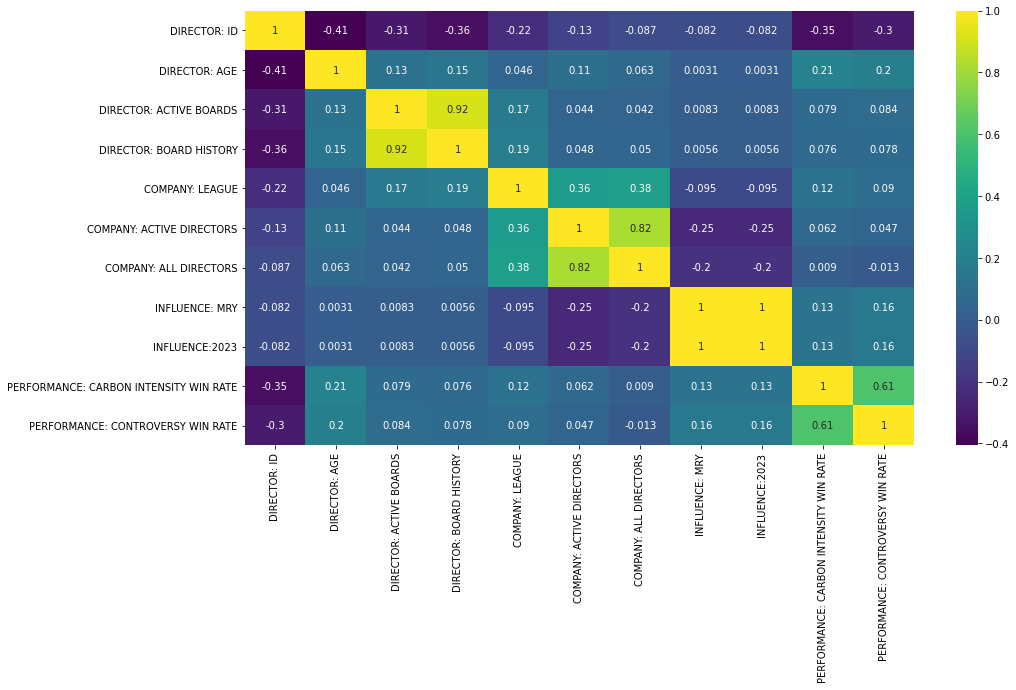

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

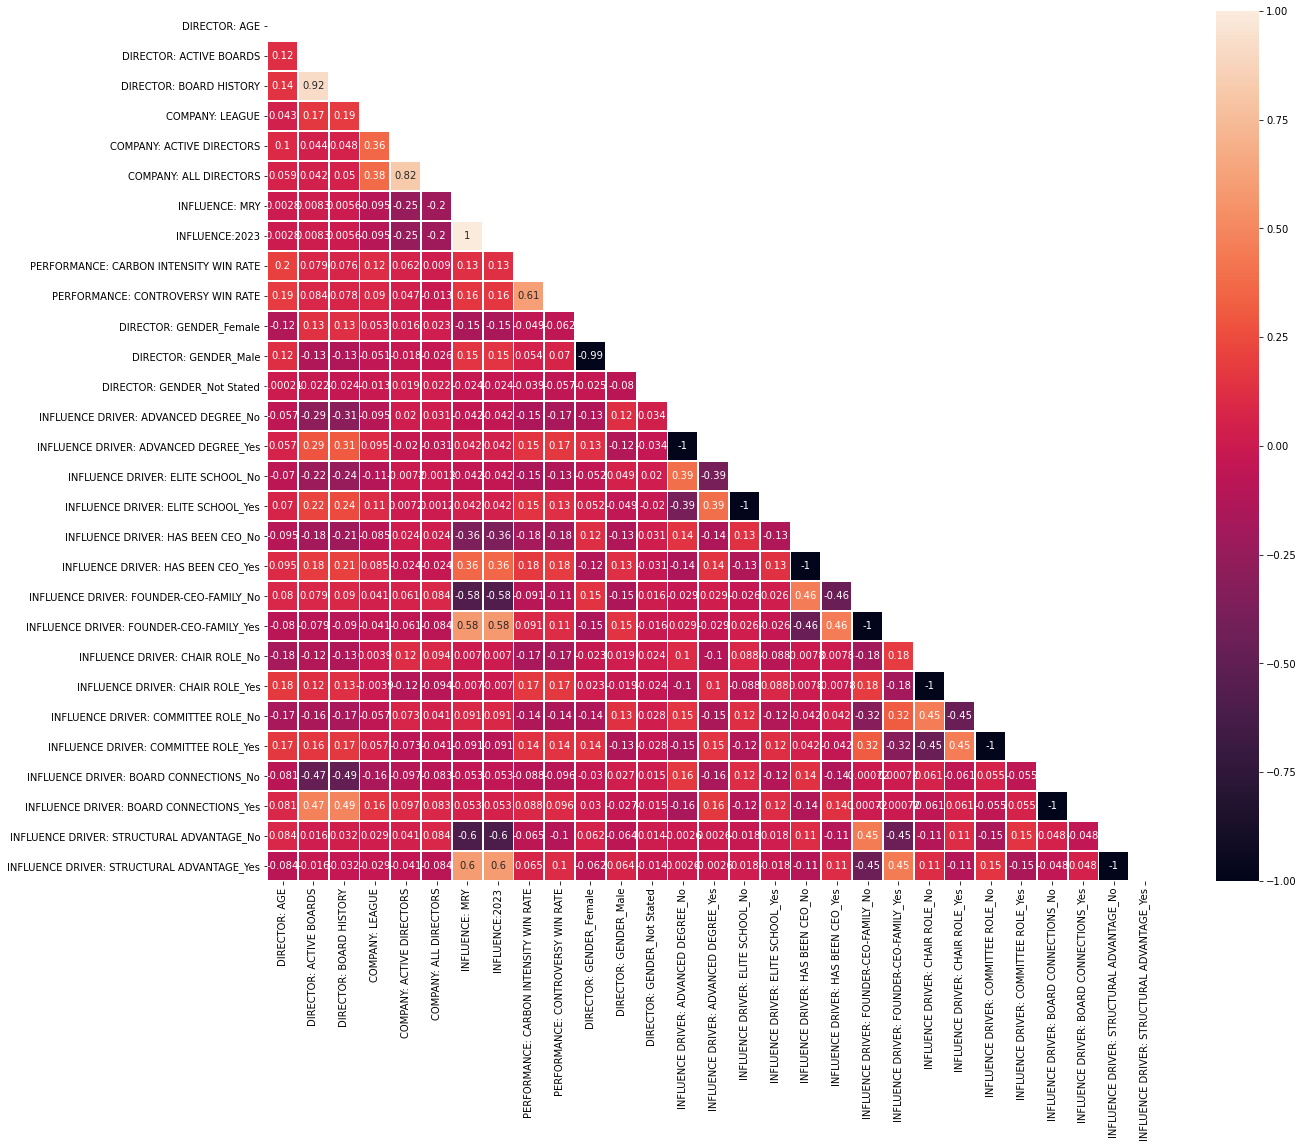

In [60]:
corr=performance_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corr, mask=mask, annot=True, linewidths=.8, ax=ax)
plt.show()

In [61]:
corr['PERFORMANCE: CONTROVERSY WIN RATE'].sort_values(ascending = False)[1:]


PERFORMANCE: CARBON INTENSITY WIN RATE        0.607065
DIRECTOR: AGE                                 0.185577
INFLUENCE DRIVER: HAS BEEN CEO_Yes            0.180425
INFLUENCE DRIVER: ADVANCED DEGREE_Yes         0.171109
INFLUENCE DRIVER: CHAIR ROLE_Yes              0.166262
INFLUENCE: MRY                                0.162914
INFLUENCE:2023                                0.162914
INFLUENCE DRIVER: COMMITTEE ROLE_Yes          0.144108
INFLUENCE DRIVER: ELITE SCHOOL_Yes            0.129147
INFLUENCE DRIVER: FOUNDER-CEO-FAMILY_Yes      0.113438
INFLUENCE DRIVER: STRUCTURAL ADVANTAGE_Yes    0.104841
INFLUENCE DRIVER: BOARD CONNECTIONS_Yes       0.096375
COMPANY: LEAGUE                               0.089904
DIRECTOR: ACTIVE BOARDS                       0.083626
DIRECTOR: BOARD HISTORY                       0.077876
DIRECTOR: GENDER_Male                         0.069731
COMPANY: ACTIVE DIRECTORS                     0.046679
COMPANY: ALL DIRECTORS                       -0.012712
DIRECTOR: 

In [62]:
performance_df =performance_df.drop(['INFLUENCE DRIVER: COMMITTEE ROLE_No',
                       'INFLUENCE DRIVER: CHAIR ROLE_No',
                       'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY_No',
                       'INFLUENCE DRIVER: HAS BEEN CEO_No',
                       'INFLUENCE DRIVER: ELITE SCHOOL_No',
                       'INFLUENCE DRIVER: ADVANCED DEGREE_No',
                       'DIRECTOR: GENDER_Not Stated',
                       'DIRECTOR: GENDER_Female',
                       
                                  ],axis=1)

In [63]:
performance_df =performance_df.drop(['INFLUENCE DRIVER: STRUCTURAL ADVANTAGE_No',
                       'INFLUENCE DRIVER: BOARD CONNECTIONS_No',
                                  ],axis=1)

In [64]:
performance_df

,DIRECTOR: AGE,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: TICKER,COMPANY: DOMICILE,COMPANY: SECTOR,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,...,PERFORMANCE: CONTROVERSY WIN RATE,DIRECTOR: GENDER_Male,INFLUENCE DRIVER: ADVANCED DEGREE_Yes,INFLUENCE DRIVER: ELITE SCHOOL_Yes,INFLUENCE DRIVER: HAS BEEN CEO_Yes,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY_Yes,INFLUENCE DRIVER: CHAIR ROLE_Yes,INFLUENCE DRIVER: COMMITTEE ROLE_Yes,INFLUENCE DRIVER: BOARD CONNECTIONS_Yes,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE_Yes
0,73.0,2,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,...,0.0,1,0,0,1,0,0,0,0,0
1,68.0,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,...,1.0,0,1,0,1,0,1,1,0,0
2,61.0,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,...,1.0,1,0,0,1,1,0,0,0,1
3,53.0,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,...,0.0,0,0,0,0,0,0,1,0,0
4,75.0,1,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,...,1.0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,58.0,2,2,Zymeworks Inc,ZYME,CA,NaN,1,8,9,...,0.0,1,1,0,1,0,0,1,0,0
86768,72.0,1,1,Zynex Inc,ZYXI,US,Health Care,1,4,4,...,1.0,1,1,0,1,0,1,1,0,0
86769,47.0,1,1,Zynex Inc,ZYXI,US,Health Care,1,4,4,...,1.0,1,0,0,1,0,1,1,0,0
86770,64.0,1,1,Zynex Inc,ZYXI,US,Health Care,1,4,4,...,1.0,1,1,0,1,0,1,1,0,0


In [65]:
performance_df.isna()

,DIRECTOR: AGE,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: TICKER,COMPANY: DOMICILE,COMPANY: SECTOR,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,...,PERFORMANCE: CONTROVERSY WIN RATE,DIRECTOR: GENDER_Male,INFLUENCE DRIVER: ADVANCED DEGREE_Yes,INFLUENCE DRIVER: ELITE SCHOOL_Yes,INFLUENCE DRIVER: HAS BEEN CEO_Yes,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY_Yes,INFLUENCE DRIVER: CHAIR ROLE_Yes,INFLUENCE DRIVER: COMMITTEE ROLE_Yes,INFLUENCE DRIVER: BOARD CONNECTIONS_Yes,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE_Yes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86768,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86769,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86770,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
performance_df.isna().sum()

DIRECTOR: AGE                                   0
DIRECTOR: ACTIVE BOARDS                         0
DIRECTOR: BOARD HISTORY                         0
COMPANY: NAME                                   0
COMPANY: TICKER                                63
COMPANY: DOMICILE                               0
COMPANY: SECTOR                               506
COMPANY: LEAGUE                                 0
COMPANY: ACTIVE DIRECTORS                       0
COMPANY: ALL DIRECTORS                          0
INFLUENCE: MRY                                  0
INFLUENCE:2023                                  0
PERFORMANCE: WIN RATE                           0
PERFORMANCE: EBITDA WIN RATE                    0
PERFORMANCE: TSR WIN RATE                       0
PERFORMANCE: CARBON INTENSITY WIN RATE          0
PERFORMANCE: CONTROVERSY WIN RATE               0
DIRECTOR: GENDER_Male                           0
INFLUENCE DRIVER: ADVANCED DEGREE_Yes           0
INFLUENCE DRIVER: ELITE SCHOOL_Yes              0


In [67]:
performance_df =performance_df.drop(['COMPANY: TICKER','COMPANY: SECTOR',
                                  ],axis=1)

In [68]:
performance_df['COMPANY: SECTOR']=performance_df['COMPANY: SECTOR'].dropna(axis=0, inplace=True)

KeyError: 'COMPANY: SECTOR'

In [69]:
performance_df

,DIRECTOR: AGE,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: DOMICILE,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,INFLUENCE: MRY,INFLUENCE:2023,...,PERFORMANCE: CONTROVERSY WIN RATE,DIRECTOR: GENDER_Male,INFLUENCE DRIVER: ADVANCED DEGREE_Yes,INFLUENCE DRIVER: ELITE SCHOOL_Yes,INFLUENCE DRIVER: HAS BEEN CEO_Yes,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY_Yes,INFLUENCE DRIVER: CHAIR ROLE_Yes,INFLUENCE DRIVER: COMMITTEE ROLE_Yes,INFLUENCE DRIVER: BOARD CONNECTIONS_Yes,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE_Yes
0,73.0,2,2,"1-800-FLOWERS.COM, INC.",US,1,11,13,0.0,0.0,...,0.0,1,0,0,1,0,0,0,0,0
1,68.0,1,1,"1-800-FLOWERS.COM, INC.",US,1,11,13,4.0,4.0,...,1.0,0,1,0,1,0,1,1,0,0
2,61.0,1,1,"1-800-FLOWERS.COM, INC.",US,1,11,13,12.0,12.0,...,1.0,1,0,0,1,1,0,0,0,1
3,53.0,1,1,"1-800-FLOWERS.COM, INC.",US,1,11,13,1.0,1.0,...,0.0,0,0,0,0,0,0,1,0,0
4,75.0,1,2,"1-800-FLOWERS.COM, INC.",US,1,11,13,2.0,2.0,...,1.0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,58.0,2,2,Zymeworks Inc,CA,1,8,9,6.0,6.0,...,0.0,1,1,0,1,0,0,1,0,0
86768,72.0,1,1,Zynex Inc,US,1,4,4,18.0,18.0,...,1.0,1,1,0,1,0,1,1,0,0
86769,47.0,1,1,Zynex Inc,US,1,4,4,17.0,17.0,...,1.0,1,0,0,1,0,1,1,0,0
86770,64.0,1,1,Zynex Inc,US,1,4,4,18.0,18.0,...,1.0,1,1,0,1,0,1,1,0,0


In [70]:
performance_df =performance_df.drop(['PERFORMANCE: EBITDA WIN RATE','PERFORMANCE: TSR WIN RATE'],axis=1)

In [73]:
performance_df

,DIRECTOR: AGE,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: DOMICILE,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,INFLUENCE: MRY,INFLUENCE:2023,...,PERFORMANCE: CONTROVERSY WIN RATE,DIRECTOR: GENDER_Male,INFLUENCE DRIVER: ADVANCED DEGREE_Yes,INFLUENCE DRIVER: ELITE SCHOOL_Yes,INFLUENCE DRIVER: HAS BEEN CEO_Yes,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY_Yes,INFLUENCE DRIVER: CHAIR ROLE_Yes,INFLUENCE DRIVER: COMMITTEE ROLE_Yes,INFLUENCE DRIVER: BOARD CONNECTIONS_Yes,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE_Yes
0,73.0,2,2,"1-800-FLOWERS.COM, INC.",US,1,11,13,0.0,0.0,...,0.0,1,0,0,1,0,0,0,0,0
1,68.0,1,1,"1-800-FLOWERS.COM, INC.",US,1,11,13,4.0,4.0,...,1.0,0,1,0,1,0,1,1,0,0
2,61.0,1,1,"1-800-FLOWERS.COM, INC.",US,1,11,13,12.0,12.0,...,1.0,1,0,0,1,1,0,0,0,1
3,53.0,1,1,"1-800-FLOWERS.COM, INC.",US,1,11,13,1.0,1.0,...,0.0,0,0,0,0,0,0,1,0,0
4,75.0,1,2,"1-800-FLOWERS.COM, INC.",US,1,11,13,2.0,2.0,...,1.0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,58.0,2,2,Zymeworks Inc,CA,1,8,9,6.0,6.0,...,0.0,1,1,0,1,0,0,1,0,0
86768,72.0,1,1,Zynex Inc,US,1,4,4,18.0,18.0,...,1.0,1,1,0,1,0,1,1,0,0
86769,47.0,1,1,Zynex Inc,US,1,4,4,17.0,17.0,...,1.0,1,0,0,1,0,1,1,0,0
86770,64.0,1,1,Zynex Inc,US,1,4,4,18.0,18.0,...,1.0,1,1,0,1,0,1,1,0,0


In [74]:
# 70/30 division of training and test dataset
X_train, X_test, y_train, y_test = train_test_split(performance_df.drop('PERFORMANCE: CONTROVERSY WIN RATE',axis=1), 
                                                    performance_df['PERFORMANCE: CONTROVERSY WIN RATE'], test_size=0.30, 
                                                    random_state=100)

In [75]:
performance_df =performance_df.drop(['COMPANY: NAME'],axis=1)

In [76]:
performance_df

,DIRECTOR: AGE,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: DOMICILE,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,INFLUENCE: MRY,INFLUENCE:2023,PERFORMANCE: WIN RATE,...,PERFORMANCE: CONTROVERSY WIN RATE,DIRECTOR: GENDER_Male,INFLUENCE DRIVER: ADVANCED DEGREE_Yes,INFLUENCE DRIVER: ELITE SCHOOL_Yes,INFLUENCE DRIVER: HAS BEEN CEO_Yes,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY_Yes,INFLUENCE DRIVER: CHAIR ROLE_Yes,INFLUENCE DRIVER: COMMITTEE ROLE_Yes,INFLUENCE DRIVER: BOARD CONNECTIONS_Yes,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE_Yes
0,73.0,2,2,US,1,11,13,0.0,0.0,0,...,0.0,1,0,0,1,0,0,0,0,0
1,68.0,1,1,US,1,11,13,4.0,4.0,1,...,1.0,0,1,0,1,0,1,1,0,0
2,61.0,1,1,US,1,11,13,12.0,12.0,1,...,1.0,1,0,0,1,1,0,0,0,1
3,53.0,1,1,US,1,11,13,1.0,1.0,0,...,0.0,0,0,0,0,0,0,1,0,0
4,75.0,1,2,US,1,11,13,2.0,2.0,1,...,1.0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,58.0,2,2,CA,1,8,9,6.0,6.0,0,...,0.0,1,1,0,1,0,0,1,0,0
86768,72.0,1,1,US,1,4,4,18.0,18.0,1,...,1.0,1,1,0,1,0,1,1,0,0
86769,47.0,1,1,US,1,4,4,17.0,17.0,1,...,1.0,1,0,0,1,0,1,1,0,0
86770,64.0,1,1,US,1,4,4,18.0,18.0,1,...,1.0,1,1,0,1,0,1,1,0,0


In [77]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)



In [78]:
X_test_encoded = pd.get_dummies(X_test)


In [79]:
# Fit the logistic regression model
logit_model1 = LogisticRegression(max_iter=3000)
logit_model1.fit(X_train_encoded, y_train)



C:\Users\Jessica Shah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

In [80]:
print(classification_report(y_test,y_pred))

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0. 1.] and y_pred=['No' 'Yes']. Make sure that the predictions provided by the classifier coincides with the true labels.

In [81]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'performance_df' is your DataFrame

# One-hot encode the entire dataset
performance_encoded = pd.get_dummies(performance_df)

# Split the encoded dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(performance_encoded.drop('PERFORMANCE: CONTROVERSY WIN RATE', axis=1), 
                                                    performance_encoded['PERFORMANCE: CONTROVERSY WIN RATE'], 
                                                    test_size=0.30, random_state=100)

# Fit the logistic regression model
logit_model1 = LogisticRegression(max_iter=3000)
logit_model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logit_model1.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      8581
         1.0       0.96      0.94      0.95     17451

    accuracy                           0.93     26032
   macro avg       0.92      0.93      0.92     26032
weighted avg       0.93      0.93      0.93     26032



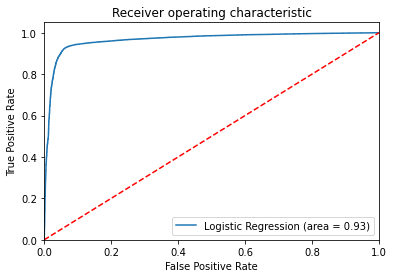

In [82]:
# ROC curve 
logit_roc_auc = roc_auc_score(y_test, logit_model1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit_model1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [83]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='')

NameError: name 'conf_matrix' is not defined

<Figure size 504x360 with 0 Axes>

In [84]:
# SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      8581
         1.0       0.96      0.93      0.95     17451

    accuracy                           0.93     26032
   macro avg       0.91      0.93      0.92     26032
weighted avg       0.93      0.93      0.93     26032



In [86]:
# KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71      8581
         1.0       0.85      0.89      0.87     17451

    accuracy                           0.82     26032
   macro avg       0.80      0.78      0.79     26032
weighted avg       0.82      0.82      0.82     26032

